# Illustration of Over- and Underfitting 

idea: use data points along a parabola, add noise to it and describe the underfitting model with a linear model, the perfect model using a quadratic model and the overfitting model by connecting all observations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
x = np.linspace(-10, 10, 500).reshape(-1,1)
y = x ** 2 + np.random.randn(x.shape[0]).reshape(-1, 1) * 1.5  # parabola on the domain incl. Gaussian white noise 
print(f"shapes:  {x.shape}, {y.shape}")

shapes:  (500, 1), (500, 1)


In [171]:
# get data stats
print(f"mean: \t {y.mean()}")
print(f"var: \t {y.var()}")

mean: 	 33.48807304037867
var: 	 896.7059776652786


In [161]:
def underfitting(x: np.array, y: np.array):
    """Computes a underfitting model to the given data. """
    x = np.append(np.ones((x.shape[0],1)), x, axis=1)
    w = np.linalg.inv(x.T @ x) @ x.T @ y
    return x @ w


def desired_model(x: np.array):
    """Computes the desired model as the parobla on the input data. """
    return x ** 2

## Fit the different models

fit a linear model with 1 DoF for the underfitting model and a quadratic model for the desired model

In [162]:
y_underfitting = underfitting(x=x, y=y)
y_desired = desired_model(x=x)
y_overfitting = y

## Plot the predictions

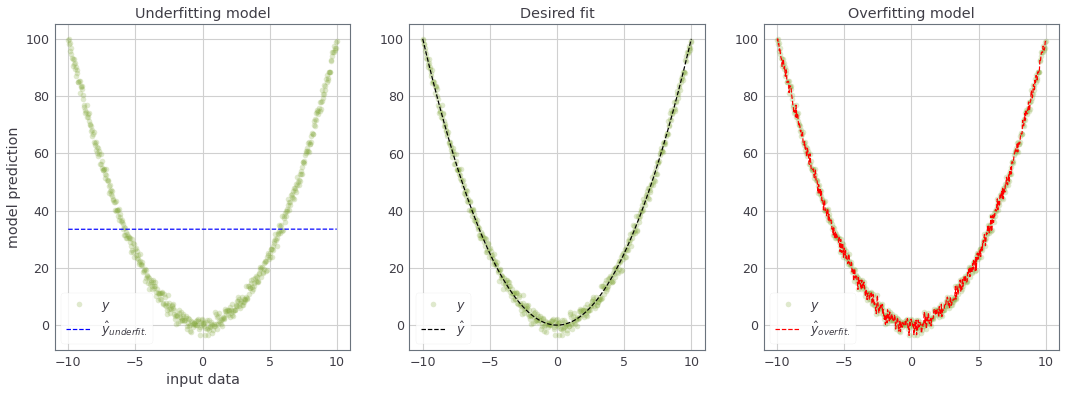

In [178]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(131)
ax1.plot(x, y, "go", label="$y$", alpha=0.25)  # ground truth data 
ax1.plot(x, y_underfitting, "--", color="blue", label="$\hat{y}_{underfit.}$")
ax1.legend()
ax1.set_title("Underfitting model")
ax1.set_xlabel("input data")
ax1.set_ylabel("model prediction")

ax2 = fig.add_subplot(132)
ax2.plot(x, y, "go", label="$y$", alpha=0.25)  # ground truth data
ax2.plot(x, y_desired, "--", color="black", label="$\hat{y}$") 
ax2.legend()
ax2.set_title("Desired fit")

ax3 = fig.add_subplot(133)
ax3.plot(x, y, "go", label="$y$", alpha=0.25)  # ground truth data 
ax3.plot(x, y_overfitting, "--", color="red", label="$\hat{y}_{overfit.}$")
ax3.legend()
ax3.set_title("Overfitting model")

plt.savefig("./outputs/under_vs_overfitting.png", dpi=300, bbox_inches="tight")
plt.show();